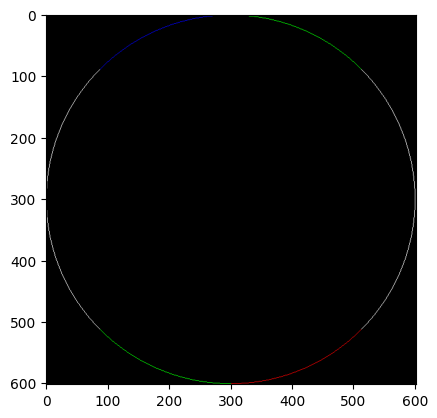

In [83]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

#CONST:
R = 0
DIMENSION = int(input("Размер полотна?"))

#
#   https://t.me/lilpentest -- просто будни
#   https://t.me/+2Hn4oyoGndcwY2Ri -- заметки по ИБ и прочему (будет обновление в скором времени)


def deltaFs(y : int):   #delta error when moving upward
    return 4 * y  + 6

def deltaFd(x : int,y : int):   #delta error when moving diagonally
    return 4 *x + 4*y + 10

def bresenham_circle(R : int, img : Image,a,b): # rasterization
    F = -2 * R + 1

    x, y = -R,0
    while (abs(x) >= abs(y)): # its obvious lol. x-> 0 and y-> +- inf || x -> +- inf and y -> 0
        img.putpixel(( x + R + a, y + R + b),  0xFFFFFF) ## lower left (if fliped -- upper left 1/8)
        img.putpixel((-x + R + a, y + R + b), 0xFFFFFF) ##lower right (if fliped -- upper right 1/8)
        img.putpixel(( x + R + a, -y + R + b),0xFFFFFF) ## upper left (if fliped -- lower left 1/8 )
        img.putpixel((-x + R + a, -y + R + b),0xFFFFFF) ## upper right (if fliped -- lower rigth 1/8 )


        img.putpixel((y + R + b, x + R + a), 0x0000FF) ## red part
        img.putpixel((-y + R + b, -x + R + a), 0xFF0000) ## blue part
        img.putpixel((y + R + b, -x + R + a), 0x00FF00)  ##green parts
        img.putpixel((-y + R + b, x + R + a), 0x00FF00)  ##green parts


        if F < 0:
            F += deltaFs(y)
        else:
            F += deltaFd(x,y)
            x +=1

        
        y += 1
        #F += deltaFs(y) if F < 0 else deltaFd(x,y) 



def main():
    R = int(input("Радиус?"))
    #R = 50
    center = (0,0)
    img = Image.new('RGB', (2*R +max(center) + 2 , 2*R + max(center) + 2))
    bresenham_circle(R,img,center[0],center[1]) #Tried to make custom circle center
    #bresen
    img = ImageOps.flip(img) ## flip the image horizontally thx Egor

    plt.imshow(img)
    plt.show()


if __name__ == "__main__":
    main()